In [17]:
import pickle
import gzip
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json

In [26]:
fr = gzip.open('/home/intern/sblee/sblee/Samsung/TT_ADNI/te/002_S_0685_20080822_r_CN_r_CN.pickle', 'rb')
f = pickle.load(fr)

qa_infos = f['qa_info'].keys()
for q in qa_infos:
    print(q)

How are age-related cognitive abilities of this patient ?
How are the cognitive abilities of this patient in relation to clinical information?
Is there any Alzheimer's Disease related protein?
How much is atrophy of hippocampus?
How much is atrophy of Amygdala?
How much is atrophy of entorhinal?
How much is atrophy of parahippocampal?
How much is atrophy of medial temporal lobe?
How much is atrophy of fusiform?
How much is atrophy of precuneus?
How much is atrophy of superiorparietal?
How much is the atrophy of the medial temporal lobe compared to the cerebral cortex?
How much is the atrophy of the parietal lobe compared to the cerebral cortex?
How much is the enlargement of ventricle?
What is the shape of the Temporal direction of the Lateral Ventricle?
What is the shape of the Frontal direction of the Lateral Ventricle?
How much is atrophy of Frontal Lobe?
How much is atrophy of Temporal Lobe?
How much is atrophy of Parietal Lobe?
How much is atrophy of Occipital Lobe?
How much is th

## Preprocess

In [24]:
# data pickles -> one dataframe

def PreprocessText(data_dir = list):
        for folder in data_dir:
                datas = []
                for file in tqdm(os.listdir(folder)): # 067_S_2301_20190806_r_CN_r_MCI.pickle
                        #idx = '002_S_0295_20060418_r_CN_r_CN'
                        fr = gzip.open(os.path.join(folder, file), 'rb')
                        f = pickle.load(fr)

                        data = dict()
                        
                        data = {'file name' : str(file)[:-7],
                                'label' : f['label'],
                                'age' : f['clinical_info'][0],
                                'sex' : f['clinical_info'][1],
                                'educ' : f['clinical_info'][2],
                                'marriage' : f['clinical_info'][3],
                                'apoe' : f['clinical_info'][4],
                                'mmse' : f['clinical_info'][5],
                                'fmri' : f['clinical_info'][6],
                                }

                        for i, v in enumerate(f['qa_info'].values()):
                                data['q{}'.format(i)] = v

                        datas.append(data)

                with gzip.open('/home/intern/sblee/sblee/Samsung/rationale/preprocessed_' + str(folder)[-2:] + '.pickle', 'wb') as f:
                        pickle.dump(datas, f)


In [25]:
data_dir = ['/home/intern/sblee/sblee/Samsung/TT_ADNI/te', '/home/intern/sblee/sblee/Samsung/TT_ADNI/tr', '/home/intern/sblee/sblee/Samsung/TT_ADNI/vl']

PreprocessText(data_dir)

100%|██████████| 303/303 [01:17<00:00,  3.90it/s]


In [16]:
# Check Unique Value

fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe.pickle', 'rb')
f = pickle.load(fr)

df = pd.DataFrame(f)

name_list = ['label', 'sex', 'educ', 'marriage', 'apoe', 'mmse', 'fmri']
for name in name_list:
    print('{}:'.format(name), len(df[name].unique()), df[name].unique())
for i in range(22):
    print('q{}:'.format(i), len(df[name].unique()), df['q{}'.format(i)].unique())

label: 3 ['MCI' 'CN' 'Dementia']
sex: 2 ['Male' 'Female']
educ: 15 [16 19 20 10 18 14 15 13 12 17 11  7  8  9  6]
marriage: 4 ['Married' 'Divorced' 'Widowed' 'Never married']
apoe: 3 ['no' 'one copy of' 'two copies of']
mmse: 26 [27. 28. 30. 29. 25. 11. 21. 22. 26. 23. 24. 20. 19. 14.  7. 16. 18. 17.
 12.  9. 15.  5.  4.  0. 10. 13.]
fmri: 3 [3.  1.5 2.9]
q0: 3 ['Good' 'Bad' 'Moderate']
q1: 3 ['Good' 'Moderate' 'Bad']
q2: 3 ['No' 'Yes']
q3: 3 ['No' 'Severe' 'Mild']
q4: 3 ['No' 'Severe' 'Mild']
q5: 3 ['No' 'Mild' 'Severe']
q6: 3 ['No' 'Severe' 'Mild']
q7: 3 ['No' 'Mild' 'Severe']
q8: 3 ['No' 'Mild' 'Severe']
q9: 3 ['No' 'Severe' 'Mild']
q10: 3 ['No' 'Severe' 'Mild']
q11: 3 ['Mild' 'No' 'Severe']
q12: 3 ['Severe' 'No' 'Mild']
q13: 3 ['Severe' 'No' 'Mild']
q14: 3 ['Round' 'Sharp' 'Moderate']
q15: 3 ['Round' 'Sharp' 'Moderate']
q16: 3 ['No' 'Severe' 'Mild']
q17: 3 ['No' 'Severe' 'Mild']
q18: 3 ['No' 'Severe' 'Mild']
q19: 3 ['No' 'Severe' 'Mild']
q20: 3 ['No' 'Severe' 'Mild']
q21: 3 ['No' '

## Input Changing

In [16]:
# change input word

def apoe(inp=int):
    if inp == 0 : answer = 'no'
    if inp == 1 : answer = 'one copy of'
    if inp == 2 : answer = 'two copies of'
    return answer

fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te.pickle', 'rb')
f = pickle.load(fr)

df = pd.DataFrame(f)
df['apoe']=df['apoe'].apply(apoe)
df = df.to_dict('records')

with gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe.pickle', 'wb') as pf:
    pickle.dump(df, pf, pickle.HIGHEST_PROTOCOL)

In [33]:
def q21(inp=int):
    if inp == 'No' : answer = 'no'
    if inp == 'Yes' : answer = ''
    return answer

fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe.pickle', 'rb')
f = pickle.load(fr)

df = pd.DataFrame(f)
df['q21']=df['q21'].apply(q21)
df = df.to_dict('records')

with gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe_q21.pickle', 'wb') as pf:
    pickle.dump(df, pf, pickle.HIGHEST_PROTOCOL)

In [35]:
fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe_q21.pickle', 'rb')
f = pickle.load(fr)

df = pd.DataFrame(f)
df['q21'].unique()

array(['no', ''], dtype=object)

## Postprocessing (Accuracy)

In [ ]:
fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe_q21.pickle', 'rb')
f = pickle.load(fr)

org = pd.DataFrame(f)
org

In [139]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def corr_ans(inp=str):
    inp = inp.lower().replace('\n','')
    output = list(inp.split())
    output_len = len(output)
    frt_output = " ".join(output[:])
    answer = 0
    
    if 'normal cognition' in frt_output : answer = 'CN'
    elif 'mild cognitive impairment' in frt_output : answer = 'MCI'
    elif 'dementia' in frt_output : answer = 'Dementia'
    else : 
        if output_len < 7 :
            if 'normal' in inp : answer = 'CN'
            elif 'mild' in inp : answer = 'MCI'
            elif 'dementia' in inp : answer = 'Dementia'
        else : 
            if 'normal' in frt_output : answer = 'CN'
            elif 'mild' in frt_output : answer = 'MCI'
            elif 'dementia' in frt_output : answer = 'Dementia'
        
    return answer


#print(df['accurate'].sum()/len(df))
# df[df['corrected_ans']=='CN' & df['groundtruth']=='Dementia']
# pred = df[['corrected_ans', 'groundtruth']]
# error = pred[pred['corrected_ans'] != pred['groundtruth']].copy()
# error['count'] = 1
# error = error.pivot_table(values = 'count', columns = 'corrected_ans', index = 'groundtruth', aggfunc = 'sum').copy()

# plt.figure(figsize = (7,3), dpi = 150)
# sns.heatmap(error, cmap = 'flare')
# plt.show()


In [190]:
def accuracy_for6(file_path):
    with open(file_path, 'r') as f :
        fr = json.load(f)

    filenames = [k for k, v in fr.items()]
    groundtruths = [v['groundtruth'] for k, v in fr.items()]
    predictions = [corr_ans(v['prediction']) for k, v in fr.items()]

    df = pd.DataFrame(zip(filenames, groundtruths, predictions), columns=['file name', 'groundtruth', 'prediction'])
    df['accurate'] = df['prediction'] == df['groundtruth']

    return df['accurate'].sum()/len(df), df

def accuracy(file_path):
    with open(file_path, 'r') as f :
        fr = json.load(f)

    fr = fr['predictions']
    filenames = [k for k, v in fr.items()]
    groundtruths = [v['groundtruth'] for k, v in fr.items()]
    predictions = [corr_ans(v['prediction']) for k, v in fr.items()]

    df = pd.DataFrame(zip(filenames, groundtruths, predictions), columns=['file name', 'groundtruth', 'prediction'])
    df['accurate'] = df['prediction'] == df['groundtruth']

    return df['accurate'].sum()/len(df), df

acc6, df6 = accuracy_for6('/home/intern/sblee/sblee/Samsung/results/prompt6.2_2023-04-03-11:09:47_predicted_results.json')
acc7, df7 = accuracy_for6('/home/intern/sblee/sblee/Samsung/results/prompt7_2023-04-03-09:35:25_predicted_results.json')
acc8, df8 = accuracy('/home/intern/sblee/sblee/Samsung/results/prompt8_2023-04-12-22:03:20_predicted_results.json')

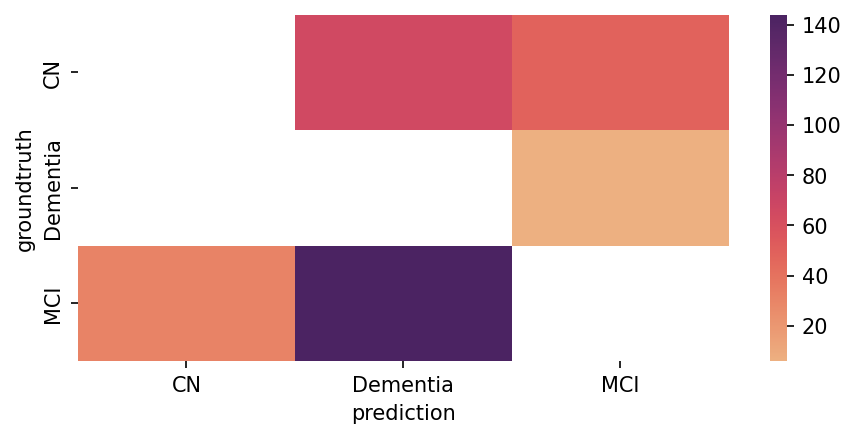

In [192]:
df = df8
pred = df[['prediction', 'groundtruth']]
error = pred[pred['prediction'] != pred['groundtruth']].copy()
error['count'] = 1
error = error.pivot_table(values = 'count', columns = 'prediction', index = 'groundtruth', aggfunc = 'sum').copy()

plt.figure(figsize = (7,3), dpi = 150)
sns.heatmap(error, cmap = 'flare')
plt.show()

In [184]:
def grth_acc(df):

    gth_d = df['groundtruth']=='Dementia'
    gth_m = df['groundtruth']=='MCI'
    gth_n = df['groundtruth']=='CN'
    pre_t = df['accurate']==True

    acc_gth_d = len(df[gth_d & pre_t])/len(df[gth_d])
    acc_gth_m = len(df[gth_m & pre_t])/len(df[gth_m])
    acc_gth_n = len(df[gth_n & pre_t])/len(df[gth_n])

    return acc_gth_d, acc_gth_m, acc_gth_n


def gr_mmse(inp):

    if inp < 20 : result = "HIGH"
    elif inp < 24 : result = "MED"
    else : result = result = "LOW"

    return result


def mmse_acc(df):

    fr = gzip.open('/home/intern/sblee/sblee/Samsung/rationale/data/preprocessed_te_apoe_q21.pickle', 'rb')
    f = pickle.load(fr)
    org = pd.DataFrame(f)

    new = pd.merge(df, org, on=None)
    new['mmse_gr']=new['mmse'].apply(gr_mmse)

    mmse_h = new['mmse_gr']=='HIGH'
    mmse_m = new['mmse_gr']=='MED'
    mmse_l = new['mmse_gr']=='LOW'
    pre_t = new['accurate']==True

    acc_mmse_h = len(new[mmse_h & pre_t])/len(new[mmse_h])
    acc_mmse_m = len(new[mmse_m & pre_t])/len(new[mmse_m])
    acc_mmse_l = len(new[mmse_l & pre_t])/len(new[mmse_l])

    return acc_mmse_h, acc_mmse_m, acc_mmse_l, new


In [196]:
acc_mmse_h, acc_mmse_m, acc_mmse_l, new = mmse_acc(df6)

mmse_h = new['mmse_gr']=='HIGH'
mmse_m = new['mmse_gr']=='MED'
mmse_l = new['mmse_gr']=='LOW'

gth_d = new['groundtruth']=='Dementia'
gth_m = new['groundtruth']=='MCI'
gth_n = new['groundtruth']=='CN'

print(len(new[mmse_h & gth_d]), len(new[mmse_h & gth_m]), len(new[mmse_h & gth_n]))

print(len(new[mmse_m & gth_d]), len(new[mmse_m & gth_m]), len(new[mmse_m & gth_n]))

print(len(new[mmse_l & gth_d]), len(new[mmse_l & gth_m]), len(new[mmse_l & gth_n]))

62 2 0
115 7 0
71 250 252


In [173]:
acc_mmse_h, acc_mmse_m, acc_mmse_l, new = mmse_acc(df6)
print(len(new[new['groundtruth']=='Dementia']), len(new[new['groundtruth']=='MCI']), len(new[new['groundtruth']=='CN']))

248 259 252


In [ ]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

df6

In [19]:
# 분석
df4, acc4 = accuracy('/home/intern/sblee/sblee/Samsung/results/prompt4_2023-03-31-17:10:40_predicted_results.json')

df6, acc6 = accuracy('/home/intern/sblee/sblee/Samsung/results/prompt6_2023-03-31-23:03:04_predicted_results.json')

false4 = df4[df4['accurate']==False].index
false6 = df6[df6['accurate']==False].index

C = set(false4) & set(false6)
len(C)/759

0.22924901185770752

In [106]:
KEY_SENETENCES = ['seems to', 'likely to', 'this patient has', 'based on', 'therefore', 'overall', 'appears to have', 'diagnosis:']

WORDS = ['dementia', 'normal', 'mild']


def base_node(inp): #not이 있거나 없는지 봄 -> 배타적으로 하나만 있는가?
    result = inp

    if ('dementia' in inp and 'normal' not in inp and 'mild' not in inp) : result = 'Dementia'
    elif ('normal' in inp and 'mild' not in inp and 'dementia' not in inp) : result = 'CN'
    elif ('mild' in inp and 'dementia' not in inp and 'normal' not in inp) : result = 'MCI'

    if ('no' in inp or 'un' in inp) : result = inp

    return result


def finding_sts(inp, key):
    inp = inp.replace(".0/","")
    inps = inp.split(".")
    result = []

    for i in inps:
        if key in i :
            result.append(i)
    
    key_stss = " ".join(result)

    return key_stss

def ACC_zCoT(response):
    inp = finding_sts(response, 'based on')

    if ('not' in inp or 'un' in inp) : result = 'what'
    else:
        if ('dementia' in inp and 'normal' not in inp and 'mild' not in inp) : result = 'Dementia'
        elif ('normal' in inp and 'mild' not in inp and 'dementia' not in inp) : result = 'CN'
        elif ('mild' in inp and 'dementia' not in inp and 'normal' not in inp) : result = 'MCI'
        else : result = 'what'

    return result


In [107]:
x ="""Based on the Mini-mental State Examination score of 27.0/30, this patient appears to have Normal Cognition. However, given the Mild medial temporal lobe atrophy compared to the cerebral cortex and Severe parietal lobe atrophy compared to the cerebral cortex, this patient may be at risk for developing Mild Cognitive Impairment or Dementia in the future. However, without any current signs or symptoms of cognitive impairment, the patient's current diagnosis is Normal Cognition."""
ACC_zCoT(x.lower())

'CN'

In [108]:
import pandas as pd
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

with open('/home/intern/sblee/sblee/Samsung/results/prompt9_2023-04-13-11:21:42_predicted_results.json', 'r') as f:
    fr = json.load(f)

df = pd.DataFrame(fr['predictions']).transpose()
df['pred'] = df['prediction'].apply(lambda x : ACC_zCoT(x.lower()))
print(len(df[df['pred']=='what']))
rsd = df[df['pred']=='what']['prediction'].unique()

for i in rsd:
    print('*****')
    print(i)

361
*****
Diagnosis: Dementia

Reasoning:
- The patient's Mini-mental State Examination score of 27.0/30 indicates mild cognitive impairment.
- The presence of one copy of the APOE4 gene is a risk factor for developing Alzheimer's disease.
- The severe atrophy in multiple areas of the brain, including the frontal, temporal, and parietal lobes, as well as the hippocampus and amygdala, is consistent with a diagnosis of dementia.
- The severe ventricle enlargement is also a common finding in dementia.
- There are no signs of vascular disease, which rules out other potential causes of cognitive impairment such as stroke or small vessel disease.

Overall, the combination of cognitive impairment, genetic risk factors and severe atrophy in multiple brain regions points towards a diagnosis of dementia.
*****
This patient has Dementia. 

Reasons for the diagnosis: 

1. The patient is at an age where dementia is a common condition. 
2. The fact that the patient has one copy of APOE4 gene, which 